In [1]:
import os,sys
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.tri as tri     # for making triangular contours
import numpy as np
import array
import math
from operator import truediv
from operator import add
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import make_interp_spline

In [2]:
# rename spc files to txt

'''
directory = 'ValidPoint'
spc_files = os.listdir(directory)

for filename in spc_files:
    spc_file_path = os.path.join(directory,filename)
    if os.path.isfile(spc_file_path):
        newfile = ''.join(letter for letter in filename if letter.isalnum())
        txtfile_path = directory+'/'+newfile+'.txt'
        os.rename(spc_file_path,txtfile_path)
        #print(os.rename(spc_file_path,txtfile_path))
'''

"\ndirectory = 'ValidPoint'\nspc_files = os.listdir(directory)\n\nfor filename in spc_files:\n    spc_file_path = os.path.join(directory,filename)\n    if os.path.isfile(spc_file_path):\n        newfile = ''.join(letter for letter in filename if letter.isalnum())\n        txtfile_path = directory+'/'+newfile+'.txt'\n        os.rename(spc_file_path,txtfile_path)\n        #print(os.rename(spc_file_path,txtfile_path))\n"

In [3]:
# Define empty lists and constant parameters

beta = []
alpha = []
sinba = []
TanB = []
M12 = []
Mh = []
MH = []
MA = []
XS_GGh_14TeV = []
BR = []
Cpl3 = []
vev_sqr = pow(246,2)

# Define path to scanned points directory

directory = 'ValidPoint'
spc_files = os.listdir(directory)

for filename in spc_files:
    spcfile_path = os.path.join(directory,filename) 
    #print(spcfile_path)
    if os.path.isfile(spcfile_path):
        with open(spcfile_path,'r') as txt_spcfile:
            lines = txt_spcfile.readlines()
            lines_itr = iter(lines)
            for i in range(0, len(lines)):
                line=lines[i]
                if line[26:31] == 'betaH':
                    beta_inRad = float(line[8:18])*0.1
                    beta_inDeg = math.degrees(beta_inRad)
                    beta.append(beta_inDeg)
                    
                if line[26:32] == 'alphaH':
                    alpha_inRad = float(line[8:18])*0.1
                    alpha_inDeg = math.degrees(alpha_inRad)
                    alpha.append(alpha_inDeg)
                    
                if line[27:34] == 'TanBeta':
                    tanB = float(line[9:19])*0.1
                    TanB.append(tanB)
                    
                if line[33:37] == 'hh_1':
                    mh = float(line[15:29])
                    Mh.append(mh)
                    
                if line[33:37] == 'hh_2':
                    mH = float(line[15:29])
                    MH.append(mH)
                    
                if line[33:37] == 'Ah_2':
                    mA = float(line[15:29])
                    MA.append(mA)
                    
                if line[27:35] == 'M12input':
                    m12 = abs(float(line[8:23]))
                    M12.append(m12)
                    
                if line[27:39] == 'Lambda3Input':
                    lamda3 = float(line[9:23])
                    Cpl3.append(lamda3)
                    
                if line[53:77] == 'BR(hh_1 -> Fd_3^* Fd_3 )':
                    brhbb = float(line[5:19])
                    BR.append(brhbb)
                    
                if line[6:63] == 'HiggsLHC14 # Higgs production cross section at LHC14 [pb]':
                    next_line = lines[i+1]
                    #print(next_line)
                    #line_itr = iter(line)
                    #print(next(line_itr))
                    ggh_xsc = float(next_line[21:35])
                    #print(ggh_xsc)
                    XS_GGh_14TeV.append(ggh_xsc)
                    
                    
    else:
        print('File '+spcfile_path+' not found!')
        

# calculate sin(b-a)        

for item1, item2 in zip(beta,alpha):
    item = item1 - item2
    sin_b_a = math.sin(item)
    sinba.append(sin_b_a)
    
    
print('size of betaH ' + str(len(beta)))
print('size of alphaH ' + str(len(alpha)))
print('size of TanBeta ' + str(len(TanB)))
print('size of Mh ' + str(len(Mh)))
print('size of MH ' + str(len(MH)))
print('size of MA ' + str(len(MA)))
print('size of M12 ' + str(len(M12)))
print('size of GGh_XSC_14TeV ' + str(len(XS_GGh_14TeV)))
print('size of BR ' + str(len(BR)))

size of betaH 789
size of alphaH 789
size of TanBeta 789
size of Mh 789
size of MH 789
size of MA 789
size of M12 789
size of GGh_XSC_14TeV 789
size of BR 789


In [20]:
# Extract XS from MG processes 

mg5_path = '/Users/ayaismail/MG5_aMC_v3_4_2'

prcs_name = 'gghh'
#prcs_name = 'gghhbbtautau'
#prcs_name = 'gghhbbbb'
#prcs_name = 'gghhbbaa'
#prcs_name = 'gghhaaaa'

prcs_dir = mg5_path+'/'+prcs_name

XS_fb_14TeV = []

for i in range(0,789):
    run_dir = prcs_dir+'/'+'out_'+str(i)
    event_dir = run_dir+'/Events/run_01'
    xs_file = os.path.join(event_dir,'run_01_tag_1_banner.txt')
    if os.path.isfile(xs_file):
        with open (xs_file, 'r') as file_:
            lines = file_.readlines()
            for line in lines:
                if line[0:25] == '#  Integrated weight (pb)':
                    xs_pb = float(line[35:42])
                    xs_fb = xs_pb*pow(10,3)
                    XS_fb_14TeV.append(xs_fb)
                    #print('XS in fb '+ str(xs_fb))      
                
                
print(len(XS_fb_14TeV))

789


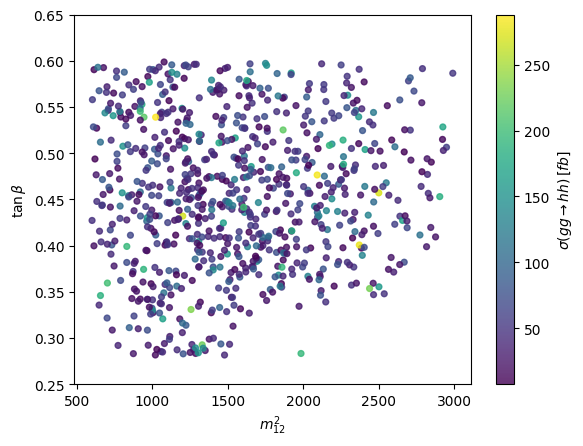

In [78]:
# TanB VS M12 & XS

plt.scatter(M12, TanB, c=XS_fb_14TeV, cmap='viridis', marker='.', s = 70, alpha = 0.8)    # inferno,Set1,plasma
plt.xlabel(r'$m_{12}^{2}$')
plt.ylabel(r'$\tan \beta$')
plt.ylim(0.25,0.65)
cb = plt.colorbar()
cb.set_label(r'$\sigma (gg \rightarrow h h) \, [fb]$')
#plt.show()
plt.savefig('TanBvsM12-XS-GGhh_colormap_viridis')
plt.close()

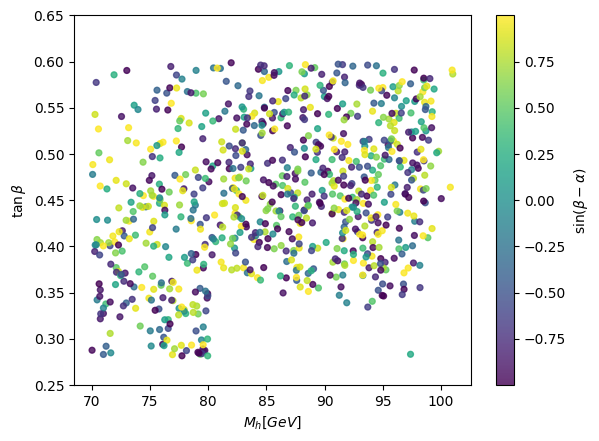

In [79]:
# create plots

# TanB VS Mh & SIN(B-A)

plt.scatter(Mh, TanB, c=sinba, cmap='viridis', marker='.', s = 70, alpha = 0.8)
plt.xlabel(r'$M_{h} [GeV]$')
plt.ylabel(r'$\tan \beta$')
plt.ylim(0.25,0.65)
cb = plt.colorbar()
cb.set_label(r'$\sin(\beta - \alpha)$')
#plt.show()
plt.savefig('TanBvsMh-Sinba_newcolormap_viridis')
plt.close()

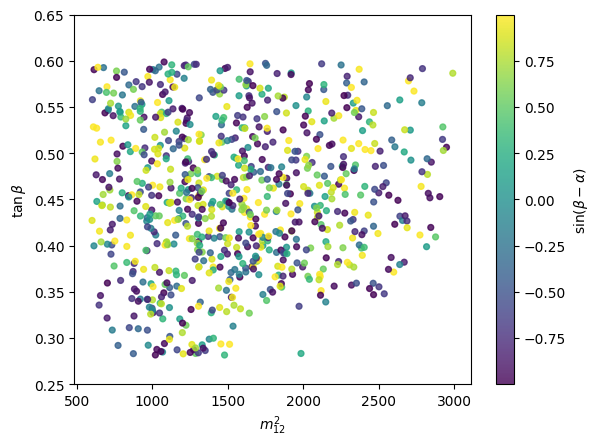

In [80]:
# TanB VS M12 & SIN(B-A)

plt.scatter(M12, TanB, c=sinba, cmap='viridis', marker='.', s = 70, alpha = 0.8)
plt.xlabel(r'$m_{12}^{2}$')
plt.ylabel(r'$\tan \beta$')
plt.ylim(0.25,0.65)
cb = plt.colorbar()
cb.set_label(r'$\sin(\beta - \alpha)$')
#plt.show()
plt.savefig('TanBvsM12-Sinba_cmap_viridis')
plt.close()

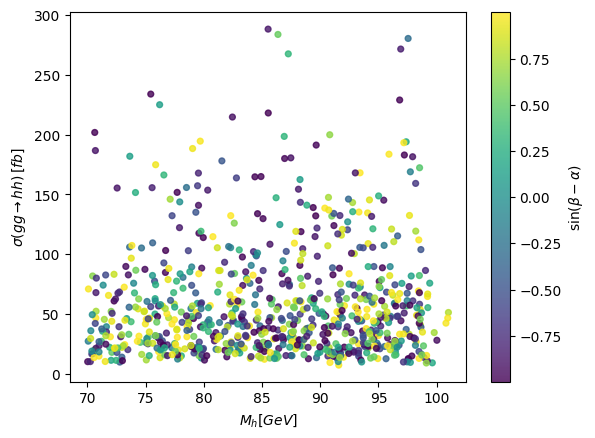

In [81]:
# XS VS Mh & SIN(B-A)

plt.scatter(Mh, XS_fb_14TeV, c=sinba, cmap='viridis', marker='.', s = 70 ,alpha = 0.8)    # inferno,Set1,plasma
plt.xlabel(r'$M_{h} [GeV]$')
plt.ylabel(r'$\sigma (gg \rightarrow hh) \, [fb]$')
#plt.xlim(65,110)
#plt.ylim(60,600)
cb = plt.colorbar()
cb.set_label(r'$\sin(\beta - \alpha)$')
#plt.show()
plt.savefig('XS-GGh-vsMh-sinba_cmap_viridis')
#plt.savefig('XS-GGh-vsMh-sinba_cmap-inferno')
#plt.savefig('XS-GGh-vsMh-sinba_cmap-gnuplot2')
plt.close()

In [7]:
plt.scatter(M12, TanB, c=Mh, cmap='viridis', marker='.', s = 100, alpha = 0.7)
plt.xlabel(r'$m_{12}^{2}$')
plt.ylabel(r'$\tan \beta$')
plt.ylim(0.25,0.65)
#plt.xticks(np.arange(-1, 1, step=0.15))
cb = plt.colorbar()
cb.set_label(r'$M_{h} [GeV]$')
#plt.show()
plt.savefig('TanBvsM12-Mh')
plt.close()

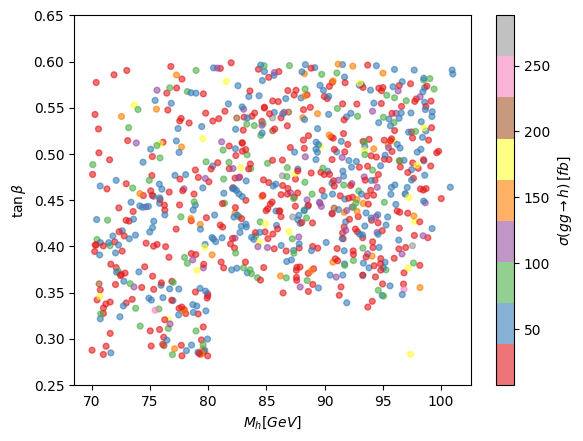

In [69]:
plt.scatter(Mh, TanB, c=XS_fb_14TeV, cmap='viridis', marker='.', s = 70, alpha = 0.6)    # inferno,Set1,plasma
plt.xlabel(r'$M_{h} [GeV]$')
plt.ylabel(r'$\tan \beta$')
plt.ylim(0.25,0.65)
cb = plt.colorbar()
cb.set_label(r'$\sigma (gg \rightarrow h) \, [fb]$')
plt.show()
#plt.savefig('TanBvsMh-XS-GGhh')
#plt.close()